In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
df=pd.read_csv("../Data.csv",index_col="Date")
df.index=pd.to_datetime(df.index)

In [27]:
df

,Close,High,Low,Open,Volume
Date,,,,,
2020-02-10,78.119225,78.119225,76.248546,76.328715,109348800
2020-02-11,77.647942,78.690182,77.429292,78.617301,94323200
2020-02-12,79.491882,79.496739,78.099800,78.099800,113730400
2020-02-13,78.925804,79.253782,78.556529,78.760603,94747600
2020-02-14,78.945267,79.195501,78.435079,78.894243,80113600
...,...,...,...,...,...
2025-02-03,228.009995,231.830002,225.699997,229.990005,73063300
2025-02-04,232.800003,233.130005,226.649994,227.250000,45067300
2025-02-05,232.470001,232.669998,228.270004,228.529999,39620300


Je vais effectuer du feature engineering en extrayant des composantes temporelles (année, mois, jour) à partir de l'index du dataset

In [28]:
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day

print(df.head())


                Close       High        Low       Open     Volume  Year  \
Date                                                                      
2020-02-10  78.119225  78.119225  76.248546  76.328715  109348800  2020   
2020-02-11  77.647942  78.690182  77.429292  78.617301   94323200  2020   
2020-02-12  79.491882  79.496739  78.099800  78.099800  113730400  2020   
2020-02-13  78.925804  79.253782  78.556529  78.760603   94747600  2020   
2020-02-14  78.945267  79.195501  78.435079  78.894243   80113600  2020   

            Month  Day  
Date                    
2020-02-10      2   10  
2020-02-11      2   11  
2020-02-12      2   12  
2020-02-13      2   13  
2020-02-14      2   14  


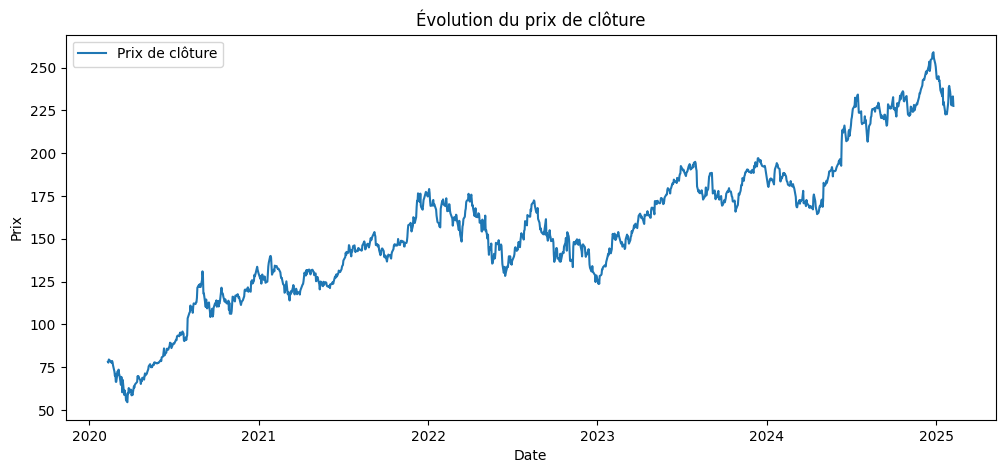

In [19]:
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Close'], label='Prix de clôture')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.title('Évolution du prix de clôture')
plt.legend()
plt.show()


 j'ajouterai des statistiques glissantes (minimum, maximum et moyenne sur 7 jours) pour capturer les tendances à court terme et enrichir l'analyse des séries temporelles

In [20]:
# Ajouter les nouvelles colonnes
df['Min_7D'] = df['Close'].rolling(window=7).min()  # Minimum sur 7 jours
df['Max_7D'] = df['Close'].rolling(window=7).max()  # Maximum sur 7 jours
df['Mean_7D'] = df['Close'].rolling(window=7).mean()  # Moyenne sur 7 jours

# Afficher les 10 premières lignes pour vérifier
print(df.head(10))


                Close       High        Low       Open     Volume  Year  \
Date                                                                      
2020-02-10  78.119225  78.119225  76.248546  76.328715  109348800  2020   
2020-02-11  77.647942  78.690182  77.429292  78.617301   94323200  2020   
2020-02-12  79.491882  79.496739  78.099800  78.099800  113730400  2020   
2020-02-13  78.925804  79.253782  78.556529  78.760603   94747600  2020   
2020-02-14  78.945267  79.195501  78.435079  78.894243   80113600  2020   
2020-02-18  77.499725  77.681935  76.433190  76.615399  152531200  2020   
2020-02-19  78.622139  78.852941  77.742676  77.742676   93984000  2020   
2020-02-20  77.815552  78.872368  77.307796  78.381620  100566000  2020   
2020-02-21  76.054169  77.851973  75.434660  77.407378  129554000  2020   
2020-02-24  72.441589  73.899264  70.267229  72.218083  222195200  2020   

            Month  Day     Min_7D     Max_7D    Mean_7D  
Date                                     

In [21]:
df

,Close,High,Low,Open,Volume,Year,Month,Day,Min_7D,Max_7D,Mean_7D
Date,,,,,,,,,,,
2020-02-10,78.119225,78.119225,76.248546,76.328715,109348800,2020,2,10,NaN,NaN,NaN
2020-02-11,77.647942,78.690182,77.429292,78.617301,94323200,2020,2,11,NaN,NaN,NaN
2020-02-12,79.491882,79.496739,78.099800,78.099800,113730400,2020,2,12,NaN,NaN,NaN
2020-02-13,78.925804,79.253782,78.556529,78.760603,94747600,2020,2,13,NaN,NaN,NaN
2020-02-14,78.945267,79.195501,78.435079,78.894243,80113600,2020,2,14,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2025-02-03,228.009995,231.830002,225.699997,229.990005,73063300,2025,2,3,222.779999,239.360001,233.122855
2025-02-04,232.800003,233.130005,226.649994,227.250000,45067300,2025,2,4,228.009995,239.360001,234.554284
2025-02-05,232.470001,232.669998,228.270004,228.529999,39620300,2025,2,5,228.009995,239.360001,234.927141


In [22]:
print(df.isnull().sum())


Close      0
High       0
Low        0
Open       0
Volume     0
Year       0
Month      0
Day        0
Min_7D     6
Max_7D     6
Mean_7D    6
dtype: int64


L'**interpolation** est une technique utilisée en analyse de séries temporelles pour estimer les valeurs manquantes en se basant sur les données existantes. Elle permet de combler les lacunes dans un dataset en calculant des valeurs intermédiaires selon différentes méthodes (linéaire, spline, polynomiale, etc.).  

Dans ce cas précis, l'exécution de `df.isnull().sum()` montre qu'il **n'y a aucune valeur manquante** dans les colonnes du dataset. **Par conséquent, l'interpolation n'est pas nécessaire**, car toutes les données sont complètes et exploitables directement sans ajustement. 

## Log_transfrom

Dans la phase de l 'exploration des données on a identifié que notre série n'est pas stationnaire, on pourrait appliquer une transformation logarithmique pour lisser les données. Cependant, *ARIMA* se chargera automatiquement de la stationnarisation grâce au differencing, donc il n'est pas nécessaire de le faire à ce stade.